In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
from experiment_mnist import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


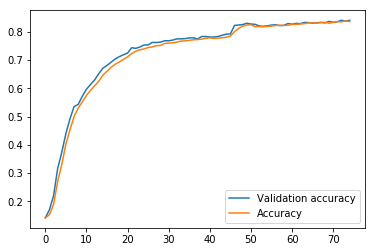

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


In [26]:
P = 0.123 # 0.001 gives 170%. Why?
K = 0.321
experiment = MNISTExperiment(N = [10], P = P, epochs = 75, KLips = K, do_print = True)

7


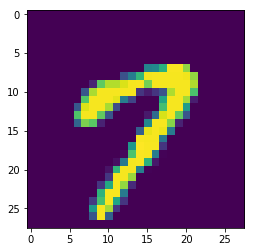

In [27]:
idx = 15
inp = experiment.x_train[idx]
img = inp.reshape(28, 28)
out = np.argmax(experiment.predict_no_dropout(inp))
print(out)
plt.imshow(img)
plt.show()

In [28]:
for _ in range(10):
    inp = np.random.randn(1, 28 ** 2)
    assert np.allclose(experiment.model_no_dropout.predict(inp), experiment.original_model.predict(inp)), "Old and new networks"

100%|██████████| 20/20 [00:13<00:00,  1.51it/s]


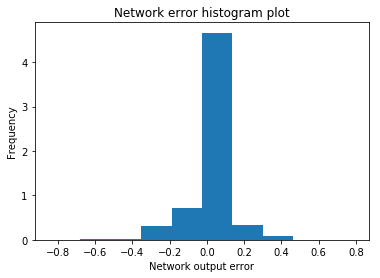

Error; maximal over inputs, average over dropout:
True values array mean: 0.099247 variance 0.211268
Experiment 0.203711 Std 0.213599
Equation   0.217236 Std 0.297444
Tightness  93.8% Std 71.8%


(0.20371088, 0.21359947, 0.21723615646362304, 0.2974440752694577, 0.21126837)

In [29]:
experiment.run(inputs = 20, repetitions = 10000, do_print = True, do_plot = True, do_tqdm = True)

100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


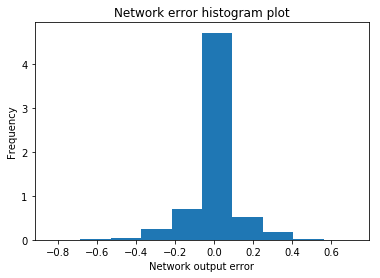

Error; maximal over inputs, average over dropout:
True values array mean: 0.096964 variance 0.215999
Experiment 0.186956 Std 0.217768
Equation   0.217236 Std 0.297444
Tightness  86.1% Std 73.2%


(0.18695576, 0.21776828, 0.21723615646362304, 0.2974440752694577, 0.21599875)

In [30]:
experiment.run(inputs = 50, repetitions = 5000, do_print = True, do_plot = True, do_tqdm = True)